In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [10]:
df_1 = pd.read_csv("data/S07-hw-dataset-01.csv")
df_2 = pd.read_csv("data/S07-hw-dataset-02.csv") 
df_4 = pd.read_csv("data/S07-hw-dataset-04.csv")


In [23]:
print(df_1.columns.tolist())

['sample_id', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08']


In [ ]:
print(df_1.head())
print(df_1.info())

   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04 

In [16]:
df_1.max()

sample_id    11999.000000
f01             24.403381
f02            112.229523
f03              0.512277
f04             75.088604
f05             13.717091
f06             41.452857
f07            213.381767
f08              2.490745
dtype: float64

In [ ]:
df_2.min()

sample_id     0.000000
x1           -2.487352
x2           -2.499237
z_noise     -34.056074
dtype: float64

In [20]:
df_1.isnull().sum()

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

In [25]:
del df_1["sample_id"]

In [29]:
scaler = StandardScaler()
df_1_scaled = scaler.fit_transform(df_1)

# 3. Превращаем результат обратно в DataFrame для удобства (опционально)
X_scaled_df = pd.DataFrame(df_1_scaled, columns=df_1.columns)

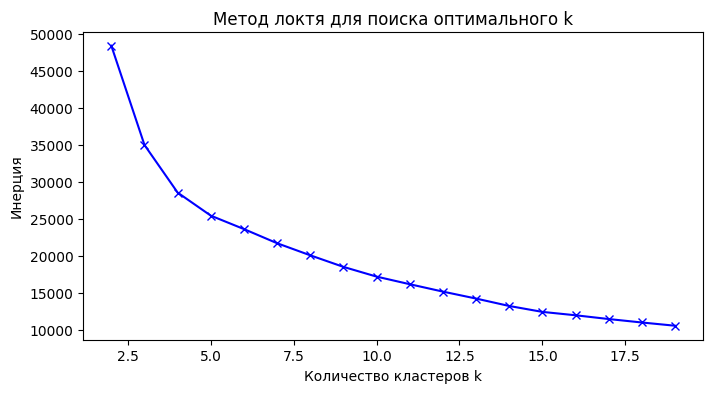

In [31]:
inertia = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_1_scaled)
    inertia.append(kmeans.inertia_)

# Теперь нужно построить график
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Инерция')
plt.title('Метод локтя для поиска оптимального k')
plt.show()

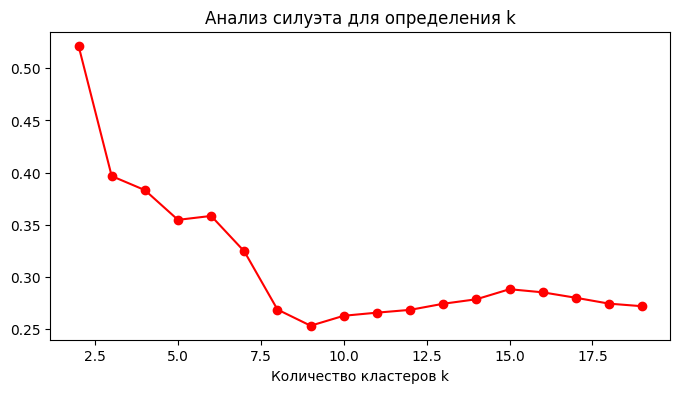

In [33]:

silhouettes = []
K_sil = range(2, 15)

for k in K_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_1_scaled)
    # Если данных много, можно считать на части: silhouette_score(X_scaled, labels, sample_size=2000)
    score = silhouette_score(df_1_scaled, labels)
    silhouettes.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K_sil, silhouettes, 'ro-')
plt.xlabel('Количество кластеров k')
plt.title('Анализ силуэта для определения k')
plt.show()

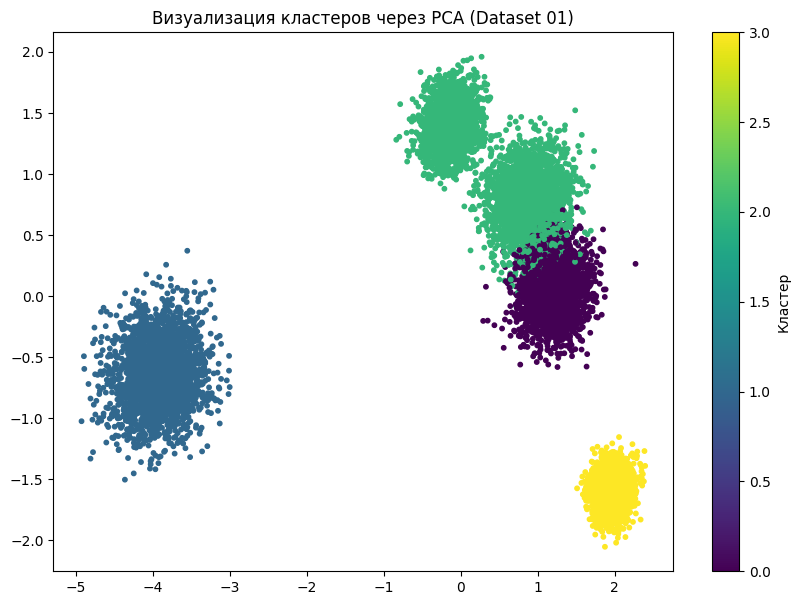

In [39]:

# 1. Сжимаем данные до 2-х компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_1_scaled) # используем наши отмасштабированные данные

# 2. Обучаем KMeans на 4 кластера
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_1_scaled)

# Теперь у нас есть координаты для графика (X_pca) и цвета для точек (labels).
# Давай попробуем их нарисовать с помощью plt.scatter
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Визуализация кластеров через PCA (Dataset 01)")
plt.colorbar(label='Кластер')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Считаем метрики
sil = silhouette_score(df_1_scaled, labels)
db = davies_bouldin_score(df_1_scaled, labels)
ch = calinski_harabasz_score(df_1_scaled, labels)

print(f"Silhouette: {sil:.4f}")
print(f"Davies-Bouldin: {db:.4f}")
print(f"Calinski-Harabasz: {ch:.4f}")

Silhouette: 0.3833
Davies-Bouldin: 1.1603
Calinski-Harabasz: 9427.4997
